<a href="https://colab.research.google.com/github/ManuMariKato/imersaodados_python_aula1_2025/blob/main/Imersaodados_python_Alura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aula 1

In [194]:
import pandas as pd


In [195]:
df = pd.read_csv("https://raw.githubusercontent.com/guilhermeonrails/data-jobs/refs/heads/main/salaries.csv")


In [196]:
df.head(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M
5,2025.0,EN,FT,Data Engineer,80000,USD,80000,US,0,US,M
6,2025.0,SE,FT,Data Scientist,185000,USD,185000,US,0,US,M
7,2025.0,SE,FT,Data Scientist,148000,USD,148000,US,0,US,M
8,2025.0,MI,FT,Data Scientist,135000,USD,135000,CA,0,CA,M
9,2025.0,MI,FT,Data Scientist,108000,USD,108000,CA,0,CA,M


In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133349 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   work_year           133339 non-null  float64
 1   experience_level    133349 non-null  object 
 2   employment_type     133349 non-null  object 
 3   job_title           133349 non-null  object 
 4   salary              133349 non-null  int64  
 5   salary_currency     133349 non-null  object 
 6   salary_in_usd       133349 non-null  int64  
 7   employee_residence  133349 non-null  object 
 8   remote_ratio        133349 non-null  int64  
 9   company_location    133349 non-null  object 
 10  company_size        133349 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 11.2+ MB


In [198]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,133339.000000,1.333490e+05,133349.000000,133349.000000
mean,2024.358770,1.632833e+05,157617.272098,20.905669
std,0.680627,2.173860e+05,74288.363097,40.590044
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2024.000000,1.060200e+05,106000.000000,0.000000
50%,2024.000000,1.470000e+05,146206.000000,0.000000
75%,2025.000000,1.990000e+05,198000.000000,0.000000
max,2025.000000,3.040000e+07,800000.000000,100.000000


In [199]:
df.shape

(133349, 11)

In [200]:
linhas, colunas = df.shape[0], df.shape[1]
print('linhas: ', linhas)
print('colunas: ', colunas)

linhas:  133349
colunas:  11


In [201]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [202]:
# utilizado com IA gemini

renomear_colunas = {
    'work_year': 'ano',
    'experience_level': 'senioridade',
    'employment_type': 'contrato',
    'job_title': 'cargo',
    'salary': 'salario',
    'salary_currency': 'moeda',
    'salary_in_usd': 'usd',
    'employee_residence': 'residencia',
    'remote_ratio': 'remoto',
    'company_location': 'empresa',
    'company_size': 'tamanho_empresa'
}

df.rename(columns=renomear_colunas, inplace=True)
df.columns


Index(['ano', 'senioridade', 'contrato', 'cargo', 'salario', 'moeda', 'usd',
       'residencia', 'remoto', 'empresa', 'tamanho_empresa'],
      dtype='object')

In [203]:
df['senioridade'].value_counts()

,count
senioridade,
SE,77241
MI,40465
EN,12443
EX,3200


In [204]:
df['contrato'].value_counts()

,count
contrato,
FT,132563
CT,394
PT,376
FL,16


In [205]:
df['remoto'].value_counts()

,count
remoto,
0,105312
100,27718
50,319


In [206]:
df['tamanho_empresa'].value_counts()

,count
tamanho_empresa,
M,129561
L,3574
S,214


In [207]:
df['empresa'].value_counts()

,count
empresa,
US,119641
CA,5239
GB,3719
AU,522
NL,404
...,...
IR,1
BS,1
IQ,1


In [208]:
# Mapear as categorias de senioridade para português
senioridade = {
    'SE': 'Sênior',
    'MI': 'Pleno',
    'EN': 'Júnior',
    'EX': 'Executivo'
}

df['senioridade'] = df['senioridade'].replace(senioridade)

# Exibir a contagem de valores para verificar a tradução
display(df['senioridade'].value_counts())

,count
senioridade,
Sênior,77241
Pleno,40465
Júnior,12443
Executivo,3200


In [209]:
# Mapear as categorias de contrato para português
contrato = {
    'FT': 'Tempo integral',
    'PT': 'Pleno',
    'Pleno': 'Freelancer',
    'CT': 'Contrato'
}

df['contrato'] = df['contrato'].replace(contrato)

# Exibir a contagem de valores para verificar a tradução
display(df['contrato'].value_counts())

,count
contrato,
Tempo integral,132563
Contrato,394
Pleno,376
FL,16


In [210]:
tamanho = {
    'S': 'Startup',
    'M': 'Médio',
    'L': 'Grande'
}

df['tamanho_empresa'] = df['tamanho_empresa'].replace(tamanho)
display(df['tamanho_empresa'].value_counts())


,count
tamanho_empresa,
Médio,129561
Grande,3574
Startup,214


In [211]:
remoto = {
    0: 'Presencial',
    50: 'Híbrido',
    100: 'Remoto'
}

df['remoto'] = df['remoto'].replace(remoto)
display(df['remoto'].value_counts())

,count
remoto,
Presencial,105312
Remoto,27718
Híbrido,319


In [212]:
df.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,Sênior,Tempo integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Médio
1,2025.0,Sênior,Tempo integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Médio
2,2025.0,Pleno,Tempo integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Médio
3,2025.0,Pleno,Tempo integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Médio
4,2025.0,Júnior,Tempo integral,Data Engineer,90000,USD,90000,US,Presencial,US,Médio


In [213]:
df.describe(include='object')

,senioridade,contrato,cargo,moeda,residencia,remoto,empresa,tamanho_empresa
count,133349,133349,133349,133349,133349,133349,133349,133349
unique,4,4,390,26,102,3,95,3
top,Sênior,Tempo integral,Data Scientist,USD,US,Presencial,US,Médio
freq,77241,132563,17314,126140,119579,105312,119641,129561


In [214]:
df.describe()

,ano,salario,usd
count,133339.000000,1.333490e+05,133349.000000
mean,2024.358770,1.632833e+05,157617.272098
std,0.680627,2.173860e+05,74288.363097
min,2020.000000,1.400000e+04,15000.000000
25%,2024.000000,1.060200e+05,106000.000000
50%,2024.000000,1.470000e+05,146206.000000
75%,2025.000000,1.990000e+05,198000.000000
max,2025.000000,3.040000e+07,800000.000000


# Aula 2

In [215]:
df.isnull()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
133344,False,False,False,False,False,False,False,False,False,False,False
133345,False,False,False,False,False,False,False,False,False,False,False
133346,False,False,False,False,False,False,False,False,False,False,False
133347,False,False,False,False,False,False,False,False,False,False,False


In [216]:
df.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,Sênior,Tempo integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Médio
1,2025.0,Sênior,Tempo integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Médio
2,2025.0,Pleno,Tempo integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Médio
3,2025.0,Pleno,Tempo integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Médio
4,2025.0,Júnior,Tempo integral,Data Engineer,90000,USD,90000,US,Presencial,US,Médio


In [217]:
df.isnull().sum()

,0
ano,10
senioridade,0
contrato,0
cargo,0
salario,0
moeda,0
usd,0
residencia,0
remoto,0
empresa,0


In [218]:
df['ano'].unique()

array([2025.,   nan, 2024., 2022., 2023., 2020., 2021.])

nan é a maneira que o python descreve 'nulo'

In [219]:
df[df.isnull().any(axis=1)]

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
5588,NaN,Sênior,Tempo integral,Product Manager,184500,USD,184500,US,Presencial,US,Médio
59692,NaN,Pleno,Tempo integral,Engineer,110000,USD,110000,DE,Presencial,DE,Médio
59710,NaN,Júnior,Tempo integral,Data Scientist,208800,USD,208800,US,Presencial,US,Médio
59759,NaN,Sênior,Tempo integral,Software Engineer,135000,USD,135000,US,Presencial,US,Médio
59789,NaN,Sênior,Tempo integral,Engineer,112000,USD,112000,US,Presencial,US,Médio
131000,NaN,Sênior,Tempo integral,Machine Learning Engineer,163800,USD,163800,US,Presencial,US,Médio
131006,NaN,Sênior,Tempo integral,Data Analytics Manager,204500,USD,204500,US,Presencial,US,Médio
133054,NaN,Júnior,Tempo integral,Data Scientist,40000,USD,40000,JP,Remoto,MY,Grande
133281,NaN,Pleno,Tempo integral,Machine Learning Engineer,180000,PLN,46597,PL,Remoto,PL,Grande
133317,NaN,Pleno,Tempo integral,Data Scientist,130000,USD,130000,US,Híbrido,US,Grande


In [220]:
#Importa um biblioteca para utilizar valores nulos
import numpy as np
#Criação de um DataFrame de teste
df_salarios = pd.DataFrame({
    'nome': ['Gustavo', 'Mariana', 'Manuela', 'Sophia', 'Marcelo'],
    'salario': [6000, np.nan, 5000, np.nan, 12000]
})

#Calcula a média salarial e substitui os nulos pela média e arredonda os valores
df_salarios['salario_media'] = df_salarios['salario'].fillna(df_salarios['salario'].mean().round(2))
# Cacula a media e substitui os nulos pela mediana
df_salarios['salario_mediana'] = df_salarios['salario'].fillna(df_salarios['salario'].median())

df_salarios

,nome,salario,salario_media,salario_mediana
0,Gustavo,6000.0,6000.00,6000.0
1,Mariana,NaN,7666.67,6000.0
2,Manuela,5000.0,5000.00,5000.0
3,Sophia,NaN,7666.67,6000.0
4,Marcelo,12000.0,12000.00,12000.0


o 'fillna' serve para preeencher os espaços em branco (na). O 'round' arredonda, no caso, com 2 casas decimais

In [221]:
df_temperaturas = pd.DataFrame ({
    'dia': ['segunda', 'terça', 'quarta', 'quinta', 'sexta'],
    'temperatura': [30, 27, np.nan, np.nan, 28]
})

df_temperaturas['preenchido_ffill'] = df_temperaturas['temperatura'].ffill()
df_temperaturas

,dia,temperatura,preenchido_ffill
0,segunda,30.0,30.0
1,terça,27.0,27.0
2,quarta,NaN,27.0
3,quinta,NaN,27.0
4,sexta,28.0,28.0


In [222]:
df_temperaturas = pd.DataFrame ({
    'dia': ['segunda', 'terça', 'quarta', 'quinta', 'sexta'],
    'temperatura': [30, 27, np.nan, np.nan, 28]
})

df_temperaturas['preenchido_bfill'] = df_temperaturas['temperatura'].bfill()
df_temperaturas

,dia,temperatura,preenchido_bfill
0,segunda,30.0,30.0
1,terça,27.0,27.0
2,quarta,NaN,28.0
3,quinta,NaN,28.0
4,sexta,28.0,28.0


In [223]:
df_cidades = pd.DataFrame({
    'nome': ['Gustavo', 'Mariana', 'Manuela', 'Sophia', 'Marcelo'],
    'cidade': ['São Paulo', np.nan, 'São Paulo', 'Rio de Janeiro', np.nan]
})

df_cidades['cidade_preenchida']= df_cidades['cidade'].fillna('Não informado')
df_cidades

,nome,cidade,cidade_preenchida
0,Gustavo,São Paulo,São Paulo
1,Mariana,NaN,Não informado
2,Manuela,São Paulo,São Paulo
3,Sophia,Rio de Janeiro,Rio de Janeiro
4,Marcelo,NaN,Não informado


In [224]:
df_limpo = df.dropna()

In [225]:
df_limpo.isnull().sum()

,0
ano,0
senioridade,0
contrato,0
cargo,0
salario,0
moeda,0
usd,0
residencia,0
remoto,0
empresa,0


In [226]:
df_limpo.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,Sênior,Tempo integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Médio
1,2025.0,Sênior,Tempo integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Médio
2,2025.0,Pleno,Tempo integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Médio
3,2025.0,Pleno,Tempo integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Médio
4,2025.0,Júnior,Tempo integral,Data Engineer,90000,USD,90000,US,Presencial,US,Médio


In [227]:
df_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 133339 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ano              133339 non-null  float64
 1   senioridade      133339 non-null  object 
 2   contrato         133339 non-null  object 
 3   cargo            133339 non-null  object 
 4   salario          133339 non-null  int64  
 5   moeda            133339 non-null  object 
 6   usd              133339 non-null  int64  
 7   residencia       133339 non-null  object 
 8   remoto           133339 non-null  object 
 9   empresa          133339 non-null  object 
 10  tamanho_empresa  133339 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 12.2+ MB


In [228]:
#Conversão de dados

df_limpo = df_limpo.assign(ano = df_limpo['ano'].astype('int64'))

# Aula 3

<Axes: title={'center': 'Distribuição de senioridade'}, xlabel='senioridade'>

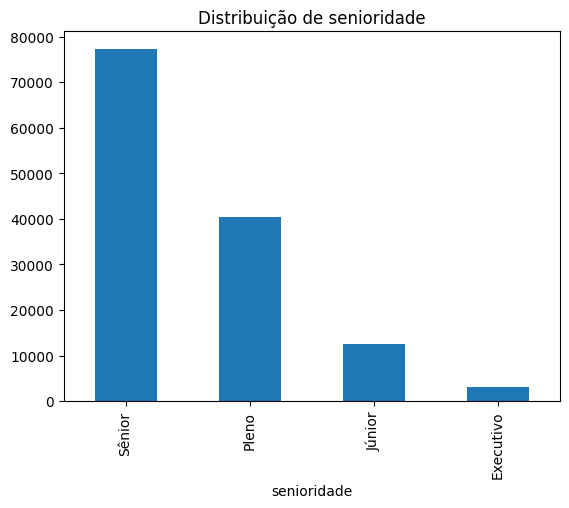

In [229]:
df_limpo['senioridade'].value_counts().plot(kind='bar', title='Distribuição de senioridade')

Bibliotecas para dados em python = 'Matplotlib' e 'Seaborn'

In [230]:
import seaborn as sns

<Axes: xlabel='senioridade', ylabel='usd'>

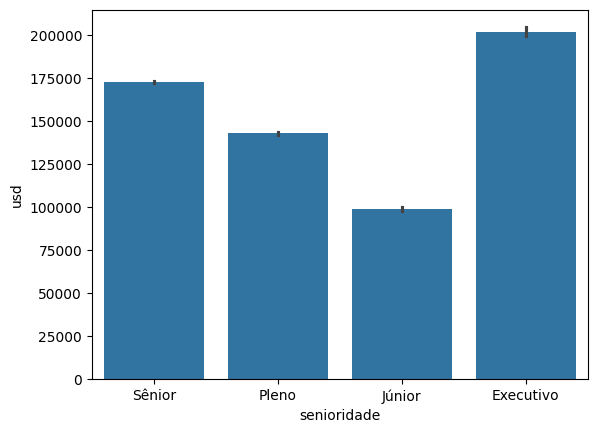

In [231]:
sns.barplot(data=df_limpo, x='senioridade', y='usd')

In [232]:
import matplotlib.pyplot as plt

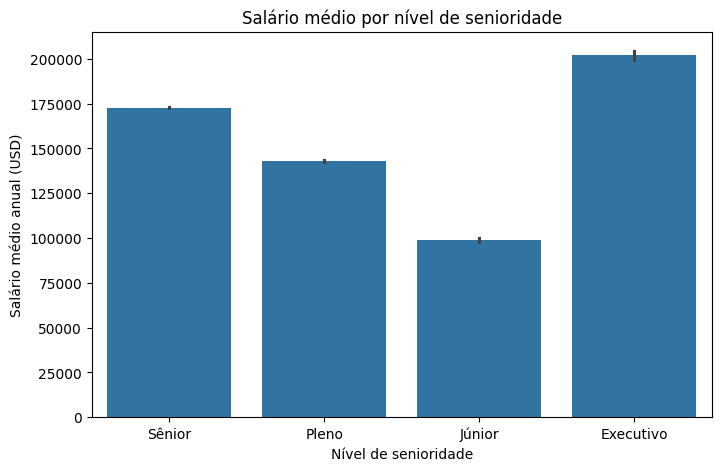

In [233]:
plt.figure(figsize=(8,5))
sns.barplot(data=df_limpo, x='senioridade', y='usd')
plt.title('Salário médio por nível de senioridade')
plt.xlabel('Nível de senioridade')
plt.ylabel('Salário médio anual (USD)')
plt.show()

Calcula a média dos valores dos salários de cada 'senioridade' e coloca os valores em ordem decrescente

In [234]:
df_limpo.groupby('senioridade')['usd'].mean().sort_values(ascending=False)

,usd
senioridade,
Executivo,202027.667813
Sênior,172850.838301
Pleno,143044.845979
Júnior,99034.963267


In [241]:
ordem = df_limpo.groupby('senioridade')['usd'].mean().sort_values(ascending=False).index

In [237]:
ordem

Index(['Executivo', 'Sênior', 'Pleno', 'Júnior'], dtype='object', name='senioridade')

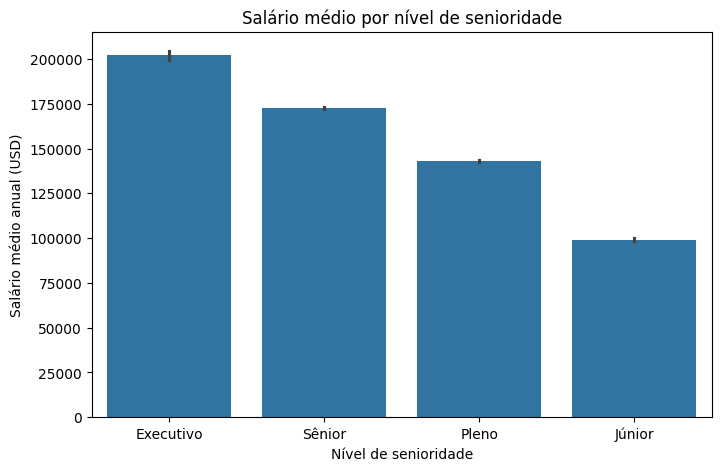

In [242]:
plt.figure(figsize=(8,5))
sns.barplot(data=df_limpo, x='senioridade', y='usd', order=ordem)
plt.title('Salário médio por nível de senioridade')
plt.xlabel('Nível de senioridade')
plt.ylabel('Salário médio anual (USD)')
plt.show()

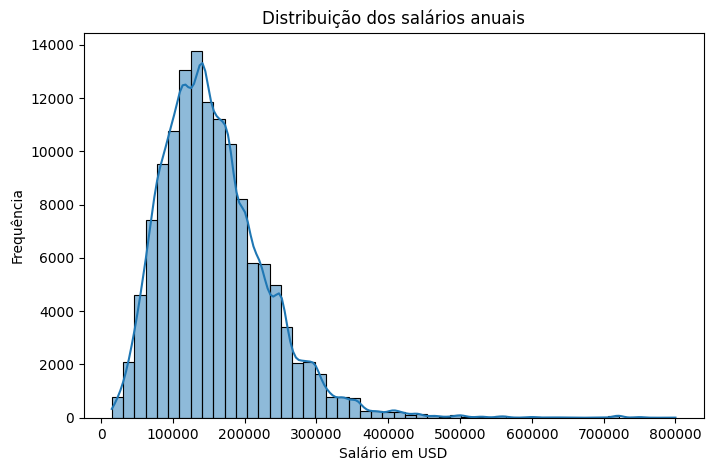

In [256]:
plt.figure(figsize=(8,5))
sns.histplot(data=df_limpo['usd'], bins=50, kde=True)
plt.title('Distribuição dos salários anuais')
plt.xlabel('Salário em USD')
plt.ylabel('Frequência')
plt.show()

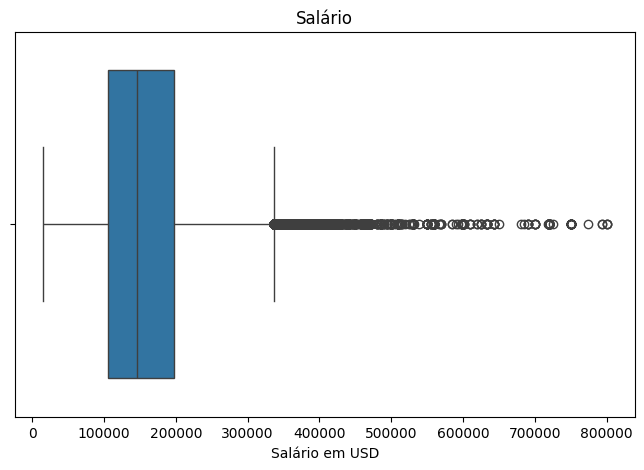

In [259]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df_limpo['usd'])
plt.title('Salário')
plt.xlabel('Salário em USD')
plt.show()

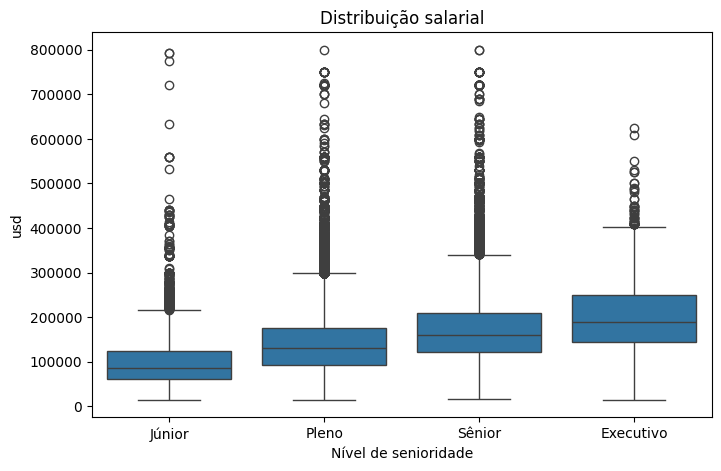

In [261]:
ordem_senioridade = ['Júnior', 'Pleno', 'Sênior', 'Executivo']
plt.figure(figsize=(8,5))
sns.boxplot(x='senioridade', y='usd', data=df_limpo, order=ordem_senioridade)
plt.title('Distribuição salarial')
plt.xlabel('Nível de senioridade')
plt.show()

Colocando Cores

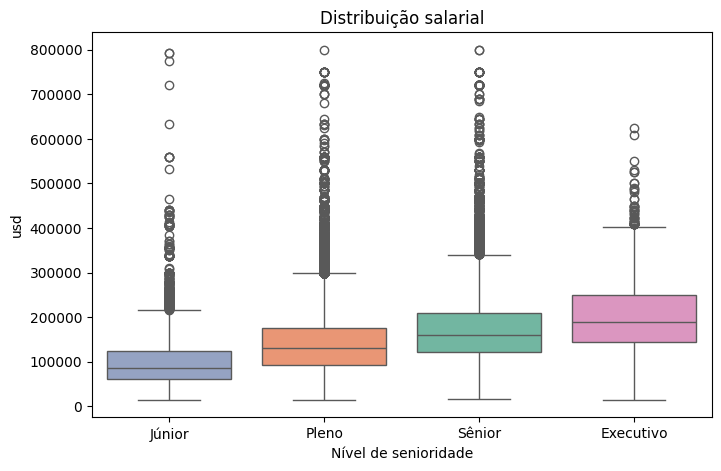

In [262]:
ordem_senioridade = ['Júnior', 'Pleno', 'Sênior', 'Executivo']
plt.figure(figsize=(8,5))
sns.boxplot(x='senioridade', y='usd', data=df_limpo, order=ordem_senioridade, palette='Set2', hue='senioridade')
plt.title('Distribuição salarial')
plt.xlabel('Nível de senioridade')
plt.show()

Gráficos interativos

In [263]:
import plotly.express as px

Cada valor da coluna é 'indexada' tendo um valor, quando resetamos pegamos apenas o os valores da primeira coluna, no caso, é a senioridade.

In [264]:
senioridade_media_salario = df_limpo.groupby('senioridade')['usd'].mean().sort_values(ascending=False).reset_index()

fig = px.bar(senioridade_media_salario, x='senioridade', y='usd',
             title='Média salarial por nível de senioridade',
             labels={'senioridade': 'Nível de senioridade', 'usd': 'Média salarial anual (USD)'})
fig.show()

Gráfico de pizza

In [265]:
remoto_contagem = df_limpo['remoto'].value_counts().reset_index()
remoto_contagem.columns = ['tipo_trabalho', 'quantidade']

fig = px.pie(remoto_contagem,
             names='tipo_trabalho',
             values='quantidade',
             title='Proporção dos títulos de trabalho')
fig.show()

Gráfico de Rosca

In [266]:
remoto_contagem = df_limpo['remoto'].value_counts().reset_index()
remoto_contagem.columns = ['tipo_trabalho', 'quantidade']

fig = px.pie(remoto_contagem,
             names='tipo_trabalho',
             values='quantidade',
             title='Proporção dos títulos de trabalho',
             hole=0.5)
fig.show()

Coloca o rótulo dentro do gráfico

In [267]:
remoto_contagem = df_limpo['remoto'].value_counts().reset_index()
remoto_contagem.columns = ['tipo_trabalho', 'quantidade']

fig = px.pie(remoto_contagem,
             names='tipo_trabalho',
             values='quantidade',
             title='Proporção dos títulos de trabalho',
             hole=0.5)
fig.update_traces(textinfo='percent+label')
fig.show()